In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def harm(t, y):
    return np.array([y[1], -y[0]])


## Пример с гармонической функцией

In [8]:
y0 = np.array([0.0, 1.0])
tspan = [0.0, 2*np.pi]
sol = solve_ivp(harm, tspan, y0, method='LSODA', atol=1.0e-10, rtol=1.0e-10)

In [9]:
sol.y

array([[ 0.00000000e+00,  9.87570492e-06,  1.97514098e-05,
         7.78713964e-04,  1.53767607e-03,  2.29663729e-03,
         2.94147234e-03,  3.58630615e-03,  4.23113848e-03,
         4.87596904e-03,  6.16562382e-03,  7.45526834e-03,
         8.74490046e-03,  1.00345180e-02,  1.13241189e-02,
         2.42187380e-02,  3.71093289e-02,  4.99937476e-02,
         6.28698512e-02,  7.57354980e-02,  8.85885482e-02,
         1.39746475e-01,  1.90533832e-01,  2.40815948e-01,
         2.90459487e-01,  3.39332809e-01,  3.87306316e-01,
         4.34252795e-01,  4.99945739e-01,  5.62877964e-01,
         6.22701957e-01,  6.79087368e-01,  7.31722834e-01,
         7.80317701e-01,  8.24603625e-01,  8.64336059e-01,
         9.13725809e-01,  9.52363116e-01,  9.79793306e-01,
         9.95693590e-01,  9.99876858e-01,  9.92293882e-01,
         9.73033898e-01,  9.42323550e-01,  9.00524228e-01,
         8.48127814e-01,  7.85750893e-01,  7.14127498e-01,
         6.34100469e-01,  5.46611541e-01,  4.52690257e-0

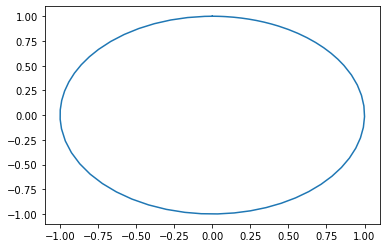

In [10]:
plt.plot(sol.y[0, :], sol.y[1, :])

In [11]:
(sol.y[:, -1] - sol.y[:, 0])

array([5.63867518e-10, 1.08794973e-10])

In [27]:
sol.nfev

77

## Задача

In [13]:
def FuncOrbite(t, y):
    r = np.copy(y[:3])
    v = np.copy(y[3:])
    return np.concatenate((v, -mu * r / np.linalg.norm(r)**3), axis=0)

In [35]:
mu = 1
y0 = np.array([1.0, 0.0, 0.0, 0.0, 1.0, 0.0])
tspan = [0.0, 2*np.pi]
ErrorRK = []
NfevRK = []
ErrorLSODA = []
NfevLSODA = []
for accuracy in range(-16, 0):
    tol = 10**accuracy
    # RK45:
    sol = solve_ivp(FuncOrbite, tspan, y0, method='RK45', atol=tol, rtol=tol)
    NfevRK.append(sol.nfev)
    error = np.linalg.norm(sol.y[:, -1] - sol.y[:, 0])
    ErrorRK.append(error)
    
    # LSODA:
    sol = solve_ivp(FuncOrbite, tspan, y0, method='LSODA', atol=tol, rtol=tol)
    NfevLSODA.append(sol.nfev)
    error = np.linalg.norm(sol.y[:, -1] - sol.y[:, 0])
    ErrorLSODA.append(error)

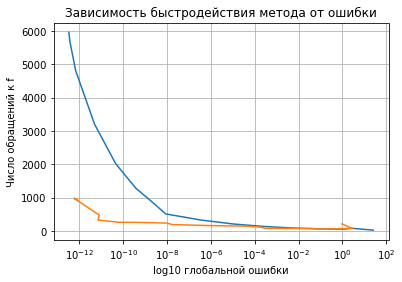

In [36]:
fig, ax = plt.subplots()
ax.semilogx(ErrorRK, NfevRK, ErrorLSODA, NfevLSODA)
ax.grid()
ax.set_title("Зависимость быстродействия метода от ошибки")
ax.set_xlabel("log10 глобальной ошибки")
ax.set_ylabel("Число обращений к f")
plt.show()